In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors

[[0. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 0.]]
[[0. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [2. 0. 1. 1. 0.]]


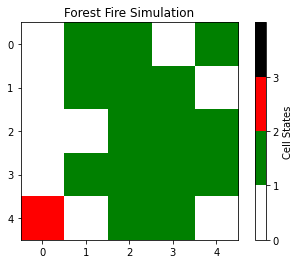

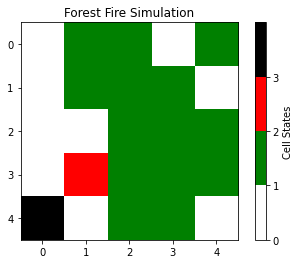

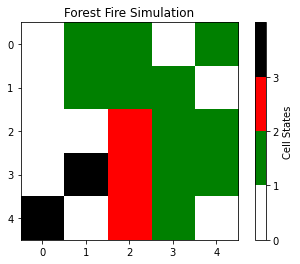

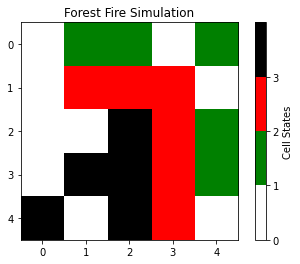

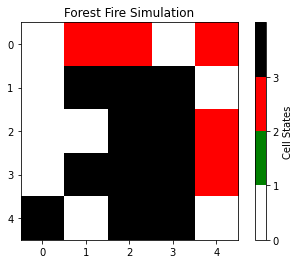

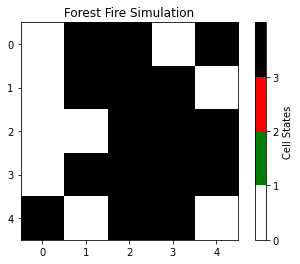

[[0. 3. 3. 0. 3.]
 [0. 3. 3. 3. 0.]
 [0. 0. 3. 3. 3.]
 [0. 3. 3. 3. 3.]
 [3. 0. 3. 3. 0.]]


In [37]:
class BurningForest:
     def __init__(self, L, p, start_edge):
        """
        
        """
        self.L = L
        self.p = p
        self.start_edge = start_edge
        self.grid = self.CreateGrid()
        #self.InitBurnEdge()
        #self.grid_after_fire = self.MoveFire()
        #self.neighbours = self.Burning_neighbor(i,j,d)
    
    
     def CreateGrid(self):
        #grid = np.zeros((L,L))
        grid = np.random.random((self.L,self.L))
        grid[grid < self.p] = 0
        grid[grid >= self.p] = 1
        return grid
    
    
     def InitBurnEdge(self):
            # up, down, left, right
        #grid_burn = np.copy(self.grid)
        if self.start_edge == "up":
            for j in range(self.L):
                if self.grid[0, j] == 1: 
                    self.grid[0, j] = 2
        elif self.start_edge == "down":
            for j in range(self.L):
                if self.grid[self.L-1, j] == 1:  
                    self.grid[self.L-1, j] = 2
        elif self.start_edge == "left":
            for j in range(self.L):
                if self.grid[j, 0] == 1:  
                    self.grid[j, 0] = 2
        elif self.start_edge == "right":
            for j in range(self.L):
                if self.grid[j, self.L-1] == 1:  
                    self.grid[j, self.L-1] = 2
                    
        #return self.grid
    
     def Burning_neighbor(self,i,j,d=1):
    
        #self.grid[i][j]=4
        subarray = self.grid[max(0, i-d):min(self.grid.shape[0], i+d+1), 
                                    max(0, j-d):min(self.grid.shape[1], j+d+1)]
        subarray_list = subarray.flatten().tolist()
        center_value = self.grid[i][j]  
    
        if center_value in subarray_list:
            subarray_list.remove(center_value)

        return any(value == 2 for value in subarray_list)
    
     def MoveFire(self):
        grid_after_fire = np.copy(self.grid)
        for i in range(self.L):
            for j in range(self.L):
                if self.grid[i, j] == 2:  # Burning cells become empty
                    grid_after_fire[i, j] = 3
                elif self.grid[i, j] == 1 and self.Burning_neighbor(i, j):
                    grid_after_fire[i, j] = 2  # Tree catches fire if a neighbor is burning
        self.grid = grid_after_fire 
        return grid_after_fire 
    
    
     def SimulateFire(self):
        """
        Run the fire simulation for a given number of steps.
        
        steps: Number of time steps to simulate
        """
        self.DisplayGrid()
        previous_grid = self.grid.copy()  # Initialize with the starting state

        while True:
            self.MoveFire()
            #self.DisplayGrid()
            if np.array_equal(self.grid, previous_grid):
                break  # Exit if the grids are the same

        # Update previous_grid for the next iteration
            previous_grid = self.grid.copy()  

        # Print the current grid state
            #print("Current Grid State:")
            #print(self.grid)
            #print()
            self.DisplayGrid()
        return self.grid
        
     def DisplayGrid(self):
        """
        Display the current state of the grid using matplotlib.
        """
        cmap = mcolors.ListedColormap(['white', 'green', 'red', 'black'])
        bounds = [0, 1, 2, 3, 4]  # Define the boundaries for each color
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        plt.imshow(self.grid, cmap=cmap, norm=norm)
        plt.title("Forest Fire Simulation")
        plt.colorbar(ticks=[0, 1, 2, 3], label='Cell States')  # Add colorbar for reference
        plt.show()

            

forest = BurningForest(L=5, p=0.6,start_edge = "left")
print(forest.grid)
forest.InitBurnEdge()
print(forest.grid)
#g = forest.grid_burn
#print(g)
#neighbors = forest.Burning_neighbor(0, 0, 1)
#print("Sąsiedzi (bez środkowej komórki):", neighbors)
print(forest.SimulateFire())

In [45]:
def if_burning_neighbor(grid,i,j,d):
    
    grid[i][j]=4
    subarray = grid[max(0, i-d):min(grid.shape[0], i+d+1), 
                                    max(0, j-d):min(grid.shape[1], j+d+1)]
    subarray_list = subarray.flatten().tolist()
    center_value = grid[i][j]  
    
    if center_value in subarray_list:
        subarray_list.remove(center_value)

    return subarray_list

if_burning_neighbor(g,0,0,1)

[1.0, 2.0, 0.0]

In [86]:
def startGrid(L,p):
    #grid = np.zeros((L,L))
    grid = np.random.random((L,L))
    grid[grid < p] = 0
    grid[grid >= p] = 1
    return grid

g = startGrid(5,0.6)
print(g)

[[1. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


In [81]:
def get_neighbors(matrix, x, y):
    num_rows, num_cols = len(matrix), len(matrix[0])
    
    for i in range( (0 if x-1 < 0 else x-1), (num_rows if x+2 > num_rows else x+2), 1  ):
        for j in range( (0 if y-1 < 0 else y-1), (num_cols if y+2 > num_cols else y+2), 1 ):
            if matrix[x][y] != matrix[i][j]:
                print(" • matrix["+str(i)+"]["+str(j)+"] = "+str(matrix[i][j]))
                
print(get_neighbors(g, 0, 2))

 • matrix[0][1] = 1.0
 • matrix[1][2] = 1.0
None


In [90]:
def is_burning_neighbor(grid_burn):
    """
    Zwraca macierz, w której:
    - wartość 0 pozostaje na miejscach, gdzie grid_burn ma 0,
    - wartość True, jeśli którakolwiek z ośmiu sąsiadujących komórek płonie,
    - wartość False w przeciwnym razie.

    :param grid_burn: Siatka, w której sprawdzamy stan komórek (macierz numpy)
    :return: Macierz o tych samych wymiarach co grid_burn, z wartościami 0, True, False
    """
    L = grid_burn.shape[0]  # Zakładamy, że grid_burn jest kwadratowy (L x L)
    result = np.zeros((L, L), dtype=object)  # Inicjalizujemy macierz wynikową
    
    for i in range(L):
        for j in range(L):
            if grid_burn[i, j] == 0:
                result[i, j] = 0  # Jeśli w grid_burn jest 0, zostawiamy 0
            else:
                # Sprawdzamy sąsiadów
                is_burning = False
                for x in range(-1, 2):
                    for y in range(-1, 2):
                        if x == 0 and y == 0:
                            continue  # Pomijamy samą komórkę
                        ni, nj = i + x, j + y
                        if 0 <= ni < L and 0 <= nj < L:  # Sprawdzamy granice siatki
                            if grid_burn[ni, nj] == 2:  # Sprawdzamy, czy sąsiad jest palący
                                is_burning = True
                                break  # Przerwij, jeśli znajdziesz płonącego sąsiada
                    if is_burning:  # Jeśli już znaleziono płonącego sąsiada, nie sprawdzaj więcej
                        break
                
                # Ustawiamy wynik na True lub False
                result[i, j] = is_burning  # True jeśli sąsiad płonie, False w przeciwnym razie

    
    return result


print(is_burning_neighbor(g))

[[False True False False 0]
 [0 0 False 0 0]
 [False 0 0 False 0]
 [0 0 0 0 False]
 [0 False False 0 False]]
